Nama : Satrya Wirangga Permana Putra<br>
NIM : 211351138<br>
Kelas : Pagi B

# import Dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satryawpp","key":"8bfd7760074f28fbfbeee7b77d485762"}'}

In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba

  0% 0.00/455k [00:00<?, ?B/s]
100% 455k/455k [00:00<00:00, 131MB/s]


In [ ]:
!mkdir groceries-dataset-for-market-basket-analysismba
!unzip groceries-dataset-for-market-basket-analysismba.zip -d groceries-dataset-for-market-basket-analysismba
!ls groceries-dataset-for-market-basket-analysismba

Archive:  groceries-dataset-for-market-basket-analysismba.zip
  inflating: groceries-dataset-for-market-basket-analysismba/Groceries data.csv  
  inflating: groceries-dataset-for-market-basket-analysismba/basket.csv  
 basket.csv  'Groceries data.csv'


# import library yang digunakan

In [ ]:
# For importing, cleaning and transforming data
import numpy as np
import pandas as pd
import seaborn as sns

# For data analysis
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# For visualisation
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import networkx as nx

# Data Discovery

In [ ]:
groceries_df = pd.read_csv('groceries-dataset-for-market-basket-analysismba/Groceries data.csv')
basket_df = pd.read_csv('groceries-dataset-for-market-basket-analysismba/basket.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
groceries_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [ ]:
groceries_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [ ]:
basket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14963 non-null  object
 1   1       14963 non-null  object
 2   2       4883 non-null   object
 3   3       2185 non-null   object
 4   4       795 non-null    object
 5   5       451 non-null    object
 6   6       276 non-null    object
 7   7       196 non-null    object
 8   8       51 non-null     object
 9   9       1 non-null      object
 10  10      1 non-null      object
dtypes: object(11)
memory usage: 1.3+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
basket_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10
count,14963,14963,4883,2185,795,451,276,196,51,1,1
unique,165,165,154,146,126,101,88,72,35,1,1
top,whole milk,whole milk,whole milk,whole milk,whole milk,shopping bags,yogurt,whole milk,shopping bags,curd,newspapers
freq,1083,983,244,111,39,25,19,14,4,1,1


# EDA (minimal 5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Top 10 most purchased item types')

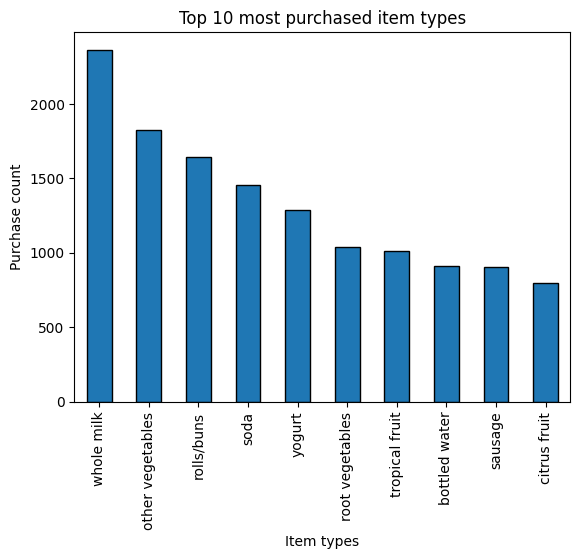

In [ ]:
groceries_df_cleaned = groceries_df.copy().drop_duplicates(keep='first')

groceries_df_cleaned['day_of_week'] = groceries_df_cleaned['day_of_week'].replace({0:'Monday', 1:'Tueday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

groceries_df_cleaned['itemDescription'].value_counts().head(10).plot(kind='bar', edgecolor='black')

plt.xlabel('Item types')
plt.ylabel('Purchase count')
plt.title('Top 10 most purchased item types')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


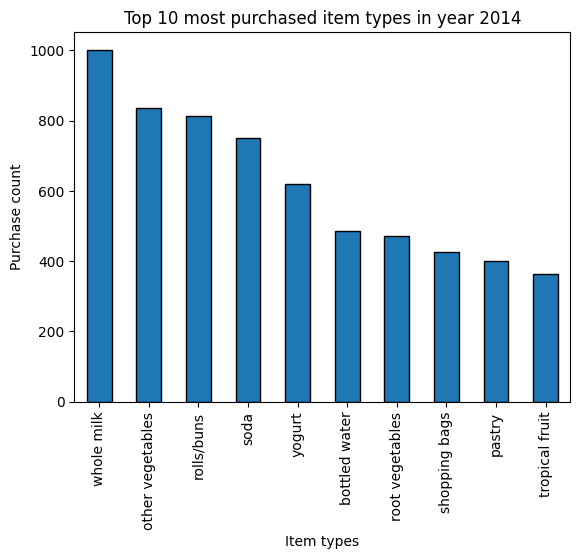

In [ ]:
# Lets see if the top 10 most purchased item types for year 2014 and year 2015 separately
groceries_df_cleaned[groceries_df_cleaned['year'] == 2014]['itemDescription'].value_counts().head(10).plot(kind='bar', edgecolor='black')

plt.xlabel('Item types')
plt.ylabel('Purchase count')
plt.title('Top 10 most purchased item types in year 2014')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


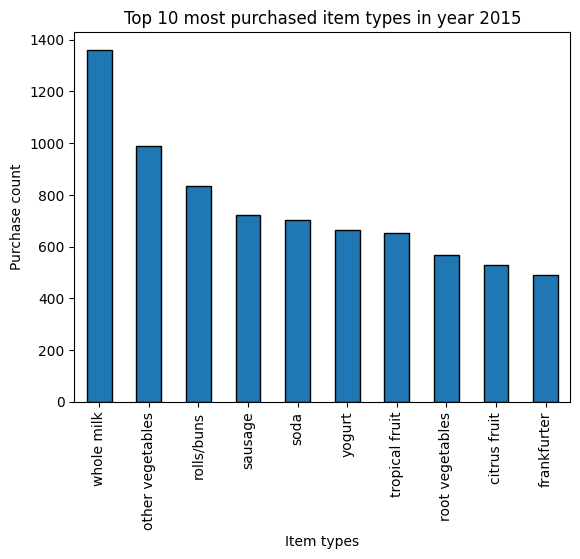

In [ ]:
groceries_df_cleaned[groceries_df_cleaned['year'] == 2015]['itemDescription'].value_counts().head(10).plot(kind='bar', edgecolor='black')

plt.xlabel('Item types')
plt.ylabel('Purchase count')
plt.title('Top 10 most purchased item types in year 2015')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

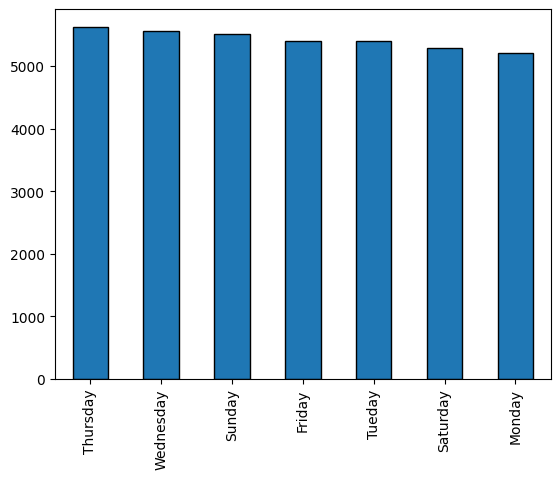

In [ ]:
# Lets see if there is any difference in purchasing pattern on different days of the week
groceries_df_cleaned['day_of_week'].value_counts().plot(kind='bar',edgecolor='black')
# There is no significant purchasing pattern on different days of the week

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2015    19981
2014    18025
Name: year, dtype: int64


Text(0.5, 1.0, 'Number of transactions: 2014 VS 2015')

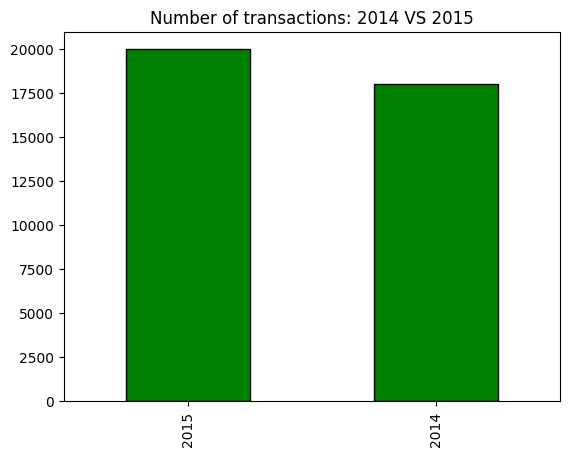

In [ ]:
# Lastly, lets see if there is any different in the number of transactions
# in year 2014 and 2015

print(groceries_df_cleaned['year'].value_counts())
groceries_df_cleaned['year'].value_counts().plot(kind='bar',edgecolor='black',color='green')
plt.title('Number of transactions: 2014 VS 2015')

# There is an increase of 1956 transaction from year 2014 to year 2015.

# Preprocessing

In [ ]:
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values,
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:


# fill na as 'NA' to tranform every value into string
basket_df.fillna('NA',inplace=True)
bk_2d = basket_df.values.tolist()
bk_2d[0]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['whole milk',
 'pastry',
 'salty snack',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA']

In [ ]:
# iterate every value which is not 'NA'
for i in range(len(bk_2d)):
    bk_2d[i] = [x for x in bk_2d[i] if not x=='NA']
bk_2d[0:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles']]

In [ ]:
TE = TransactionEncoder()
TE.fit(bk_2d)
item_matrix = TE.transform(bk_2d)
bk_item = pd.DataFrame(item_matrix, columns = TE.columns_)
print(bk_item.shape)
bk_item.head()

(14963, 167)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# modeling

In [ ]:
# get the support values by Apriori
bk_freq_items = apriori(bk_item, min_support=0.01, use_colnames=True, max_len=2)
bk_freq_items.sort_values(by = "support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
62,0.157923,(whole milk)
40,0.122101,(other vegetables)
46,0.110005,(rolls/buns)
52,0.097106,(soda)
63,0.085879,(yogurt)
...,...,...
64,0.010559,"(other vegetables, rolls/buns)"
29,0.010559,(herbs)
45,0.010493,(red/blush wine)
44,0.010158,(processed cheese)


In [ ]:


# get a dataframe with support, confidence, and lift values by Association Rules
bk_rules = association_rules(bk_freq_items, metric = "confidence", min_threshold = 0)
bk_rules



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
6,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
7,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
8,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
9,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525


# Visualisasi hasil algoritma

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


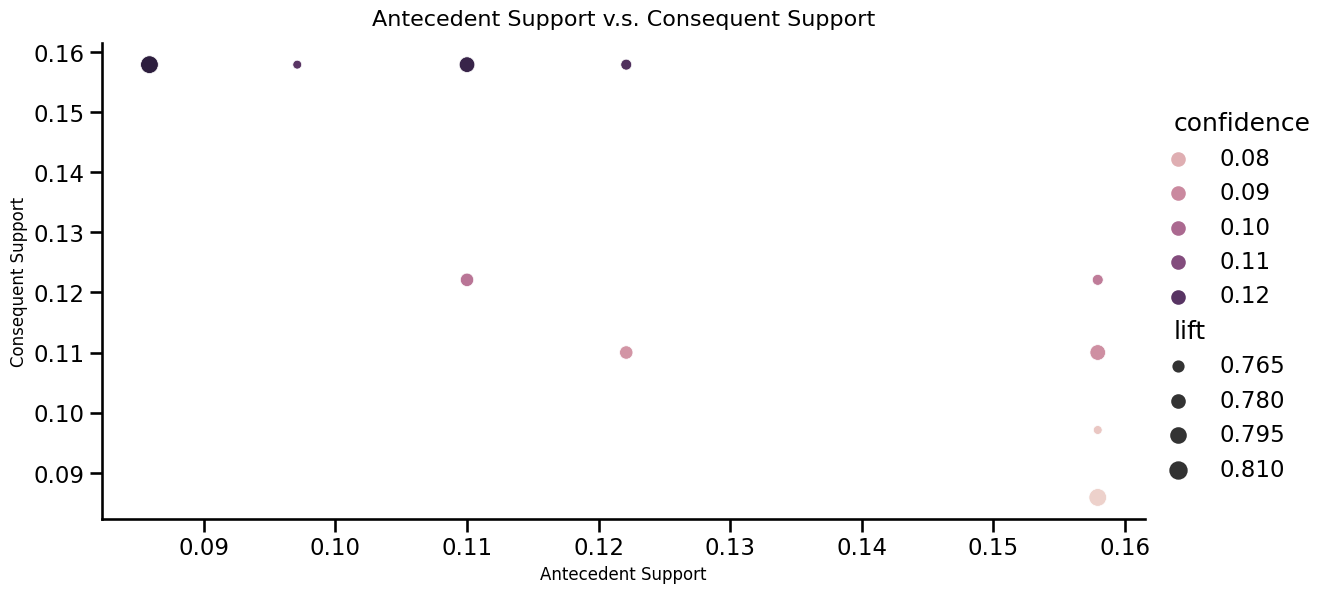

In [ ]:


# only 10 combinations when preparing it based on each transaction
sns.set_context("talk")
sns.relplot(x='antecedent support', y='consequent support', data=bk_rules,
            size='lift', hue='confidence', height=6, aspect=2)
plt.title("Antecedent Support v.s. Consequent Support", fontsize=16, y=1.02)
plt.xlabel('Antecedent Support', fontsize=12)
plt.ylabel('Consequent Support', fontsize=12)
plt.show()



In [ ]:
# Add Zhang's values to complete the dataframe
bk_rules_zhangs_list = zhangs_rule(bk_rules)
bk_rules = bk_rules.assign(zhang = bk_rules_zhangs_list)
bk_rules['antecedents'] = bk_rules['antecedents'].apply(lambda a: ', '.join(list(a)))
bk_rules['consequents'] = bk_rules['consequents'].apply(lambda a: ', '.join(list(a)))
bk_rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
0,other vegetables,rolls/buns,0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553,-0.236553
1,rolls/buns,other vegetables,0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091,-0.234091
2,other vegetables,whole milk,0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477,-0.254477
3,whole milk,other vegetables,0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461,-0.262461
4,whole milk,rolls/buns,0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474,-0.224474


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


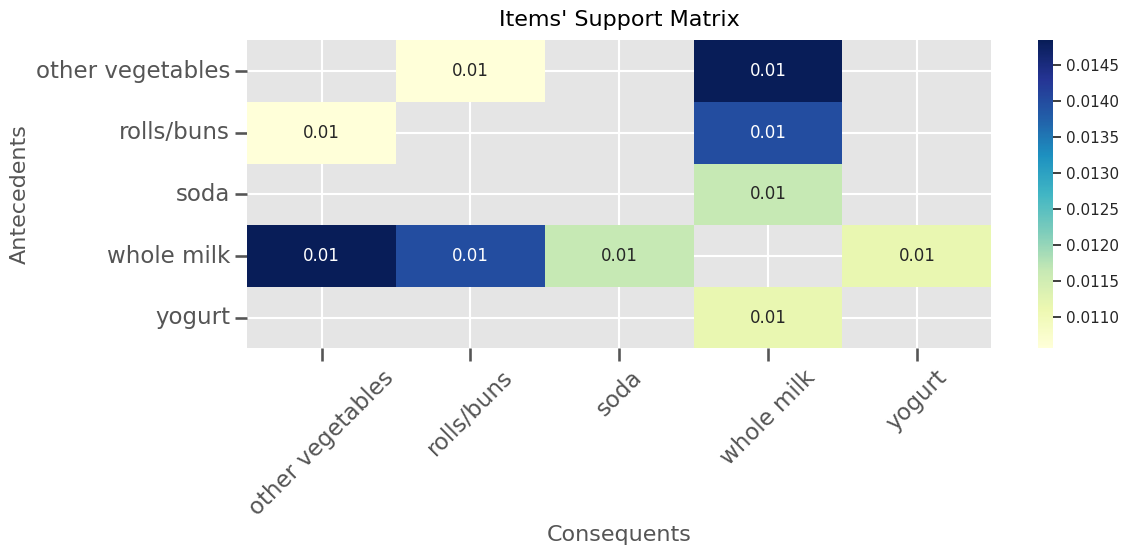

In [ ]:
# plot a heatmap to know how strong the association is based on lift values
bk_pivot_suport = bk_rules.pivot(index='antecedents', columns='consequents', values='support')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(12, 4))
sns.set()
ax = sns.heatmap(data=bk_pivot_suport, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Items' Support Matrix", fontsize=16, y=1.02)
ax.set_xlabel("Consequents",fontsize=16)
ax.set_ylabel("Antecedents",fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# review the heatmap see whether whole milk is also the item with the highest confidence
bk_pivot_confi = bk_rules.pivot(index = 'antecedents', columns = 'consequents', values= 'confidence')

fig = go.Figure(data=go.Heatmap(x=bk_pivot_confi.columns, y=bk_pivot_confi.index, z=bk_pivot_confi,
                                colorscale='ylgnbu', reversescale=False))
fig.update_layout(
    template='ggplot2',
    autosize=False,
    width=800,
    height=400,
    title="Confidence Matrix",
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="Black"
    )
)
fig.update_layout(title_x=0.5, title_y=0.86)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



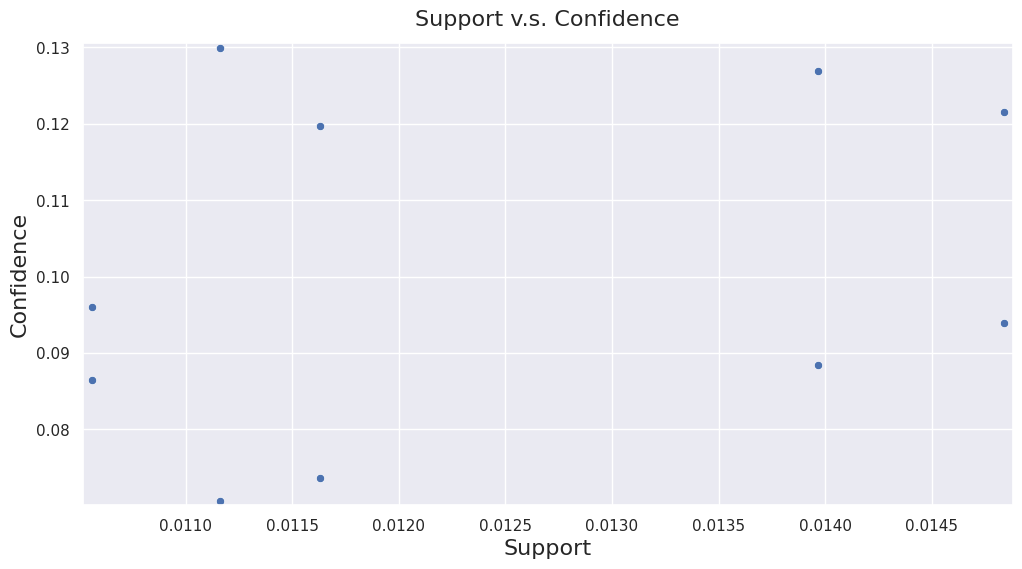

In [ ]:
# See the distribution of these 10 combinations
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x = "support", y = "confidence", data = bk_rules, alpha=1)
plt.title("Support v.s. Confidence", fontsize=16, y=1.02)
ax.set_xlabel("Support",fontsize=16)
ax.set_ylabel("Confidence",fontsize=16)
plt.margins(0.01,0.01)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



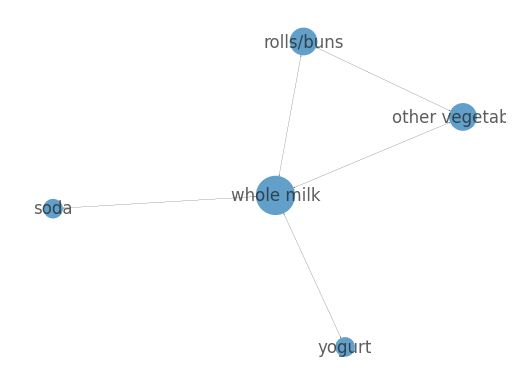

In [ ]:
bk_network = bk_rules[['antecedents', 'consequents']]

bk_network_G = nx.from_pandas_edgelist(
    bk_network,
    source = 'antecedents',
    target = 'consequents',
    create_using = nx.DiGraph())

network_bt = nx.in_degree_centrality(bk_network_G)
bk_network_bt = pd.DataFrame(list(network_bt.items()), columns = ['item', 'centrality'])
bk_network_bt = bk_network_bt.dropna(axis=0)

pos = nx.kamada_kawai_layout(bk_network_G)

sizes = [x[1]*100 for x in bk_network_G.degree()]

nx.draw_networkx(bk_network_G, pos,
    with_labels = True,
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

plt.axis('off')
plt.show()

# save model (pickle)

In [ ]:
#Dikarnakan streamlit py tidak menggunakan sav. Maka Tidak dibuat save model.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

